### PERSIANN

###### This is an algorithm that retrieves rain fall data from infared images taken from satellites. This is very similar to what we want to do interms of getting rainfall data from satellite imamges. This algorithm uses a deep neural network to acheive rain fall data.

The data comes in formates of YYDDDHH, where YY is 2 number of the current year, DDD is the 3 digit number of day of the year, and hh is the 2 digit number representing the hour of the year. The current data comes in sets of hourly, 3 hourly, monthly, and then yearly. The current data set that i will be working with will be would be the hourly dataset since it corresponds to the half hour and 15 increments from the satellite data and radar data.

The lat and long converage of the data will be 
   60 to -60 lat
   0 to 360 long

In [15]:
import numpy as np
from matplotlib import pylab as plt
f = open('m6s4rr1800100.bin', 'r')

In [21]:
A = np.fromfile('m6s4rr1800100.bin', dtype='int16', sep="")

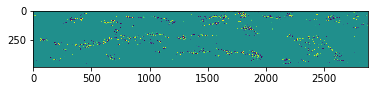

In [25]:
A = A.reshape([480, 2880])
plt.imshow(A)

In [26]:
from mpl_toolkits.basemap import Basemap

/home/yuan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/yuan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/yuan/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:2950: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:


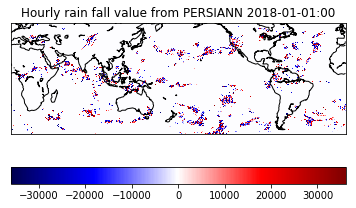

In [65]:
lat_min = -60
lat_max = 60
lon_min = 0
lon_max = 360
y = [-60, -30, 0, 30, 60]
x = [-30, -60, ]
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2)
m.drawcoastlines()

m.imshow(A, cmap='seismic')
plt.colorbar(orientation='horizontal')
plt.title('Hourly rain fall value from PERSIANN 2018-01-01:00')

plt.savefig('Hourly rain fall value from PERSIANN 2018-01-01:00')

In [ ]:

def graph_persiann_data(directoryname): 
    '''
    Given directory, this function will visualize and graph the images from the PERSIANN algorithm and 
    save as an image with the appropriate title. 
    '''
    import os
    import numpy as np
    list_len = len(np.fromfile(directoryname+os.listdir(directoryname)[0],dtype='int16',count=-1,sep=''))
    output_list = np.zeros(list_len)#[0] * list_len
   
    for data in os.listdir(directoryname):
        A = np.fromfile(data, dtype='int16', sep="")
        A = A.reshape([480, 2880])
        lat_min = -60
        lat_max = 60
        lon_min = 0
        lon_max = 360
        y = [-60, -30, 0, 30, 60]
        x = [-30, -60, ]
        m = Basemap(llcrnrlon=lon_min,
                    llcrnrlat=lat_min,
                    urcrnrlon=lon_max,
                    urcrnrlat=lat_max,
                    lat_0=(lat_max - lat_min)/2,
                    lon_0=(lon_max-lon_min)/2)
        m.drawcoastlines()

        #m.imshow(A, cmap='seismic')
        plt.colorbar(orientation='horizontal')
        plt.title('Hourly rain fall value of' + data)

        plt.savefig('Hourly rain fall value of' + data)
        
